In [1]:
%cd /home/raphael/MILA/ift6759/Solar-Irradiance-Prediction
# Il faut utiliser CD pour s'assurer de rouler dans la racine i.e. '/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction'
%pwd 

/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction


'/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction'

Il va falloir ajuster ça ici.

In [2]:

#%cd   #change to the dir you want 
from src.data import dataloader as dl
from src.data import metadata as meta
from src.data import config
from src.data import image
import logging

bnd_coordinates  = meta.Coordinates(40.05192, -88.37309, 230)
logging.basicConfig(level=logging.INFO)

meta_config = config.read_configuration_file("tests/data/samples/train_config_raphael.json") #Il faut ajuster les path ici!

metadata = meta.MetadataLoader(dataframe=meta_config.catalog)
reader = image.ImageReader()
config = {}
config["LOCAL_PATH"] = "/home/raphael/MILA/ift6759/project1_data/hdf5v7_8bit/"
config["SKIP_MISSING"] = True
dataloader = dl.DataLoader(reader, config)
metaloader= metadata.load(meta.Station.BND,bnd_coordinates, target_datetimes=meta_config.target_datetimes, night_time=False, skip_missing=True)
dataset = dataloader.create_dataset(metaloader)

In [3]:
str(meta.Coordinates(36.62373, -116.01947, 1007))

'(36.62373,-116.01947,1007)'

INFO:root:/project/cq-training-1/project1/data/hdf5v7_8bit/2011.09.27.0800.h5,2011-09-27 16:30:00,(40.05192,-88.37309,230)


tf.Tensor([ 62.633335 100.74     149.16      54.506668], shape=(4,), dtype=float32)


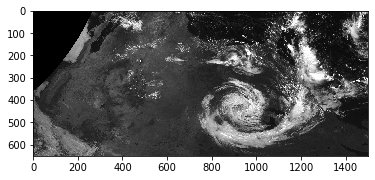

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
for (sample, target) in dataset:
    print (target)
    plt.imshow(sample.numpy().squeeze(), cmap='gray', vmin = 0, vmax = 128)
    break

In [27]:
config["ENABLE_META"] = True
dataloader = dl.DataLoader(reader, config)
metaloader= metadata.load(meta.Station.BND,bnd_coordinates, target_datetimes=meta_config.target_datetimes, night_time=False, skip_missing=True)
dataset = dataloader.create_dataset(metaloader)


INFO:root:/project/cq-training-1/project1/data/hdf5v7_8bit/2013.11.19.0800.h5,2013-11-19 20:00:00,(40.05192,-88.37309,230)


tf.Tensor([470.77335 294.7       0.        0.     ], shape=(4,), dtype=float32)
tf.Tensor([345.16782 196.70169   0.        0.        0.     ], shape=(5,), dtype=float32)


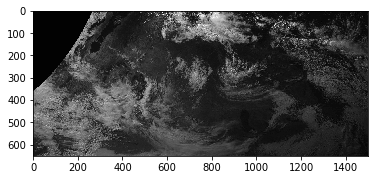

In [31]:
for (sample, target, augmented_features) in dataset:
    print (target)
    print (augmented_features)
    plt.imshow(sample.numpy().squeeze(), cmap='gray', vmin = 0, vmax = 128)
    break

In [11]:
train_timestamps = metadata.catalog.sample(frac=1).index[0:int(0.9*len(metadata.catalog))]
train_timestamps_string = train_timestamps.strftime("%Y-%m-%d %H:%M:%S").tolist()

In [12]:
import pandas as pd
metadata.catalog.loc[pd.Timestamp("2013-11-19 23:00:00")]

ncdf_path            /project/cq-training-1/project1/data/netcdf/GO...
hdf5_8bit_path       /project/cq-training-1/project1/data/hdf5v7_8b...
hdf5_8bit_offset                                                    60
hdf5_16bit_path      /project/cq-training-1/project1/data/hdf5v5_16...
hdf5_16bit_offset                                                   60
BND_DAYTIME                                                          0
BND_CLEARSKY_GHI                                                     0
BND_CLOUDINESS                                                   night
BND_GHI                                                          -2.32
TBL_DAYTIME                                                          1
TBL_CLEARSKY_GHI                                               55.6232
TBL_CLOUDINESS                                         slightly cloudy
TBL_GHI                                                        70.4067
DRA_DAYTIME                                                          1
DRA_CL

In [7]:
validation_timestamps = metadata.catalog.sample(frac=1).index[int(0.9*len(metadata.catalog)):]
validation_timestamps_string = validation_timestamps.strftime("%Y-%m-%d %H:%M:%S").tolist()

In [8]:
train_start_bound = train_timestamps.min().strftime("%Y-%m-%d %H:%M:%S")
train_end_bound = train_timestamps.max().strftime("%Y-%m-%d %H:%M:%S")

In [9]:
validation_start_bound = validation_timestamps.min().strftime("%Y-%m-%d %H:%M:%S")
validation_end_bound = validation_timestamps.max().strftime("%Y-%m-%d %H:%M:%S")

In [10]:
import json
train_config_json = json.loads("""

{
    "dataframe_path": "tests/data/samples/catalog-test.pkl",
    "start_bound": "2015-01-01",
    "end_bound": "2016-01-01",
    "stations": {
      "BND": [40.05192, -88.37309, 230],
      "TBL": [40.12498, -105.23680, 1689],
      "DRA": [36.62373, -116.01947, 1007],
      "FPK": [48.30783, -105.10170, 634],
      "GWN": [34.25470, -89.87290, 98],
      "PSU": [40.72012, -77.93085, 376],
      "SXF": [43.73403, -96.62328, 473]
    },
    "target_time_offsets": [
      "P0DT0H0M0S",
      "P0DT1H0M0S",
      "P0DT3H0M0S",
      "P0DT6H0M0S"
    ],
    "target_datetimes":  ["2010-06-19 22:15:00", "2012-03-24 12:00:00",
    "2015-09-21 21:15:00", "2012-07-06 18:00:00",
    "2014-07-13 00:00:00", "2010-08-31 20:45:00",
    "2015-04-16 12:45:00", "2013-04-17 16:00:00",
    "2012-08-15 00:00:00", "2010-11-14 19:15:00",
    "2014-07-21 14:30:00", "2011-11-22 17:30:00",
    "2010-08-15 23:00:00", "2010-05-11 19:00:00",
    "2013-02-15 14:15:00", "2011-02-08 17:45:00"]
  }
  
""")

In [11]:
train_config_json["start_bound"] = train_start_bound
train_config_json["end_bound"] = train_end_bound
train_config_json["target_datetimes"] = train_timestamps_string

In [12]:
with open('train_config.json', 'w') as outfile:
    json.dump(train_config_json, outfile)

In [13]:
validation_config_json = train_config_json
validation_config_json["start_bound"] = validation_start_bound
validation_config_json["end_bound"] = validation_end_bound
validation_config_json["target_datetimes"] = validation_timestamps_string
with open('validation_config.json', 'w') as outfile:
    json.dump(train_config_json, outfile)
